### Name: Vaishnavi Harale

## Task 2: Prediction using Decision Tree Algorithm

# LGMVIP Data Science Task 2 

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [2]:
# Reading Iris dataset from csv file
iris=pd.read_csv(r'Downloads\iris2.csv')


In [3]:
iris

,Id,SepalLenghthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### checking datatypes

In [4]:
iris.dtypes

Id                  int64
SepalLenghthCm    float64
SepalWidthCm      float64
 PetalLengthCm    float64
 PetalWidthCm     float64
Species            object
dtype: object

### shape of datasets

In [5]:
iris.shape

(150, 6)

### Information regarding data

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              150 non-null    int64  
 1   SepalLenghthCm  150 non-null    float64
 2   SepalWidthCm    150 non-null    float64
 3    PetalLengthCm  150 non-null    float64
 4    PetalWidthCm   150 non-null    float64
 5   Species         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


#### Describe function gives the basic numerical info about data for each numeric feature

In [7]:
iris.describe()

,Id,SepalLenghthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.620000,5.843333,3.054000,3.758667,1.198667
std,43.494452,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


#### Data points count value for each species

In [8]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
iris.count()

Id                150
SepalLenghthCm    150
SepalWidthCm      150
 PetalLengthCm    150
 PetalWidthCm     150
Species           150
dtype: int64

#### Plotting

<AxesSubplot:xlabel='count', ylabel='Species'>

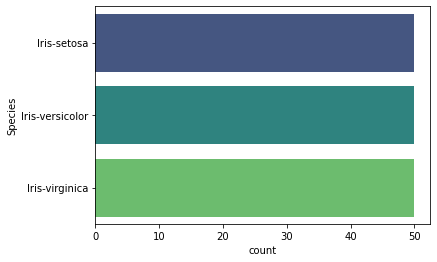

In [10]:
sns.countplot(y = 'Species', data = iris, palette = "viridis" )

### Data Visualization

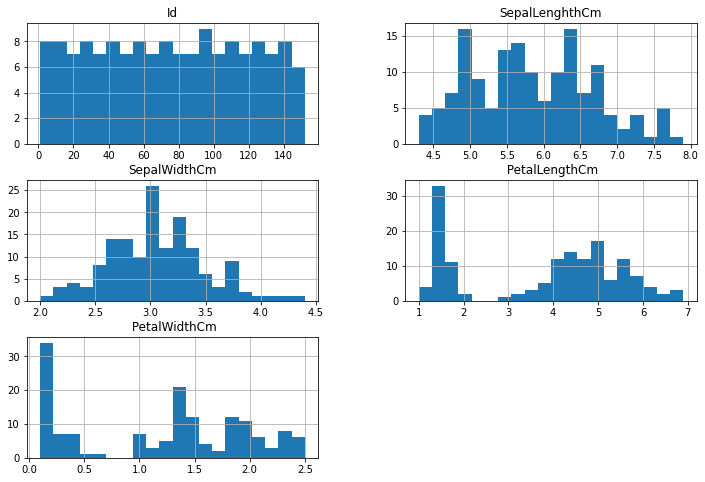

In [11]:
iris.hist(figsize=(12,8), bins=20)
plt.title("Features Distribution")
plt.show()

#### Pair Plot

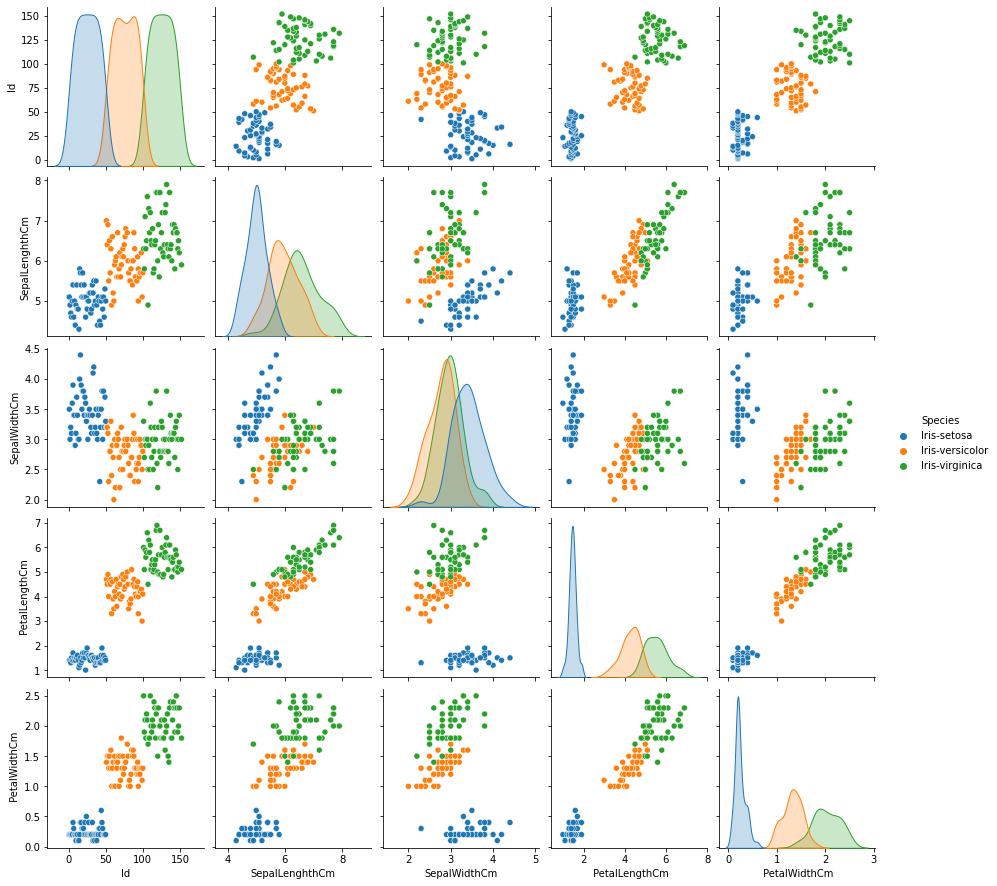

In [12]:
sns.pairplot(data=iris, hue='Species')
plt.show()

### Correlation Matrix

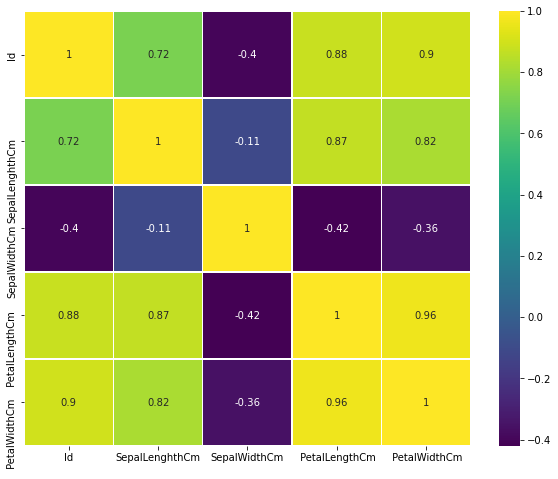

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(), annot=True, cmap="viridis", linewidths=0.4)
plt.show()

### Preprocessing the Data

In [14]:
x = iris.iloc[:, :-1].values
y = iris.iloc[:, :-1].values

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Encoded Species']=le.fit_transform(iris['Species'])

In [16]:
iris.head()

,Id,SepalLenghthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
iris.tail()

,Id,SepalLenghthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,152,5.9,3.0,5.1,1.8,Iris-virginica,2


In [18]:
x=iris.drop(["Species"], axis=1)
y=iris["Species"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model = clf.fit(x_train,y_train)

In [21]:
prediction=clf.predict(x_test)

### Classification Report 

In [22]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



#### Confusion Matrix

In [23]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


#### Accuracy

In [24]:
print(accuracy_score(y_test,prediction)*100, "%")

100.0 %


### Decision Tree

[Text(535.6800000000001, 453.0, 'X[5] <= 1.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(357.12, 271.8, 'X[4] <= 0.8\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(178.56, 90.59999999999997, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(535.6800000000001, 90.59999999999997, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(714.24, 271.8, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

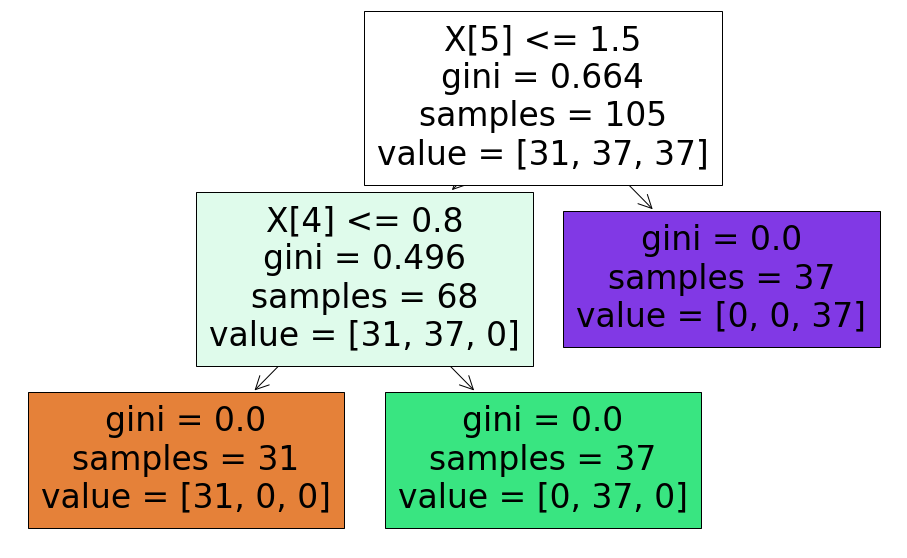

In [25]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(clf,filled=True)